# Introduction
This is a preliminary analysis of the directions to sample the rush results.

# Initialization

In [5]:
from src.utils.misc import FDSampleRushResult, rand_binomial_binary, FDSampleRush
from matplotlib import pyplot as plt

In [11]:
# Sampling results with differing number of attributes (3 to 16)
timeout = lambda x: 15 + 2 ** (x/2)
res = []

for num_attr in range(3, 17):
    rush = FDSampleRush(num_attr)
    rush.set_fd_distribution(rand_binomial_binary, **{'bit_len': num_attr, 'p': 0.5})
    rush.run(timeout(num_attr), debug=False)
    print(FDSampleRushResult.summarize(rush.get_results()))
    res.append(rush)


{'num_bcnf': 220094, 'num_3nf': 223001, 'num_2nf': 225291, 'total_time': 10.519069194793701}
{'num_bcnf': 75960, 'num_3nf': 81628, 'num_2nf': 86072, 'total_time': 14.605067491531372}
{'num_bcnf': 26938, 'num_3nf': 32110, 'num_2nf': 35580, 'total_time': 17.726049184799194}
{'num_bcnf': 9982, 'num_3nf': 13907, 'num_2nf': 15833, 'total_time': 21.091744899749756}
{'num_bcnf': 3769, 'num_3nf': 6369, 'num_2nf': 7142, 'total_time': 24.91044521331787}
{'num_bcnf': 1502, 'num_3nf': 3271, 'num_2nf': 3591, 'total_time': 30.389129161834717}
{'num_bcnf': 629, 'num_3nf': 1790, 'num_2nf': 1905, 'total_time': 37.12749147415161}
{'num_bcnf': 319, 'num_3nf': 1153, 'num_2nf': 1209, 'total_time': 46.66171050071716}
{'num_bcnf': 161, 'num_3nf': 773, 'num_2nf': 789, 'total_time': 59.904592990875244}
{'num_bcnf': 81, 'num_3nf': 509, 'num_2nf': 521, 'total_time': 78.84182691574097}
{'num_bcnf': 42, 'num_3nf': 329, 'num_2nf': 330, 'total_time': 105.40171933174133}
{'num_bcnf': 31, 'num_3nf': 208, 'num_2nf': 21

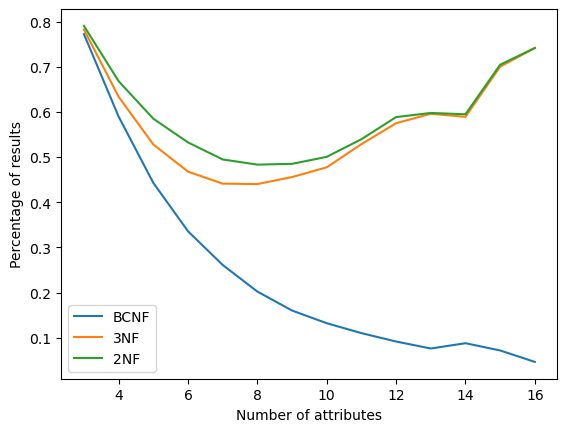

In [16]:
# Plotting the results
# The x-axis is the number of attributes
# The y-axis (in different colours) is the percentage of BCNF, 3NF, and 2NF results
# For each of rush result, the format returned by FDSampleRushResult.summarize(rush.get_results()) is as follows: {'num_bcnf': ..., 'num_3nf': ..., 'num_2nf': ..., 'total_time': ...}.
# The total number of results can be obtained by getting the length of rush.get_results()
fig, ax = plt.subplots()
ax.set_xlabel('Number of attributes')
ax.set_ylabel('Percentage of results')
ax.plot(range(3, 17), [FDSampleRushResult.summarize(r.get_results())['num_bcnf']/len(r.get_results()) for r in res], label='BCNF')
ax.plot(range(3, 17), [FDSampleRushResult.summarize(r.get_results())['num_3nf']/len(r.get_results()) for r in res], label='3NF')
ax.plot(range(3, 17), [FDSampleRushResult.summarize(r.get_results())['num_2nf']/len(r.get_results()) for r in res], label='2NF')

ax.legend()

### Preliminary findings
1. With small number of attributes, almost every result that's in 2NF is also in 3NF and BCNF.
2. There seems to be a divergence between 2NF and 3NF for a while, but they converge again after around 12 attributes (based on my other tests, the probability of a relation with more than 16 attributes having a 2NF result that's not in 3NF is very low).
3. The number of results in BCNF seems to follow some logarithmic pattern (I tested until 20 attributes). This makes sense when each attribute is sampled uniformly and independently of the others: The number of 1s in a binary string of length $n$ follows a binomial distribution; as the number of attributes increases, the number of FDs to pick from also increases, but the probability of a random FD being a superkey decreases (need to follow up on this). By virtue thereof, the probability of a random relation being in 3NF increases dramatically as the number of attributes increases due to the resulting higher number of prime attributes.
4. To follow up on point 3, I tried setting a scarce probability of 0.1 for an attribute to be in FD. The result is (unsurprisingly) that the percentage of BCNF results converges with the percentage of 3NF and 2NF results. I initially thought of using Poisson distribution to model the number of 1s in a binary string, but then I concluded (as the point below) that a uniform sampling is best to avoid bias -before then performing a specific analysis that segregates the results based on a certain distribution.
5. Setting the distribution of the number of FDs to a uniform random distribution (as we're currently doing) seem to be OK and won't impact our analysis. I propose that we keep doing this, and then perform an analysis later that segregates the results based on the number of FDs in the relation; pre-skewing the results to a certain distribution might add bias and complicates the analysis unrelated to the number of FDs.